<a href="https://colab.research.google.com/github/sadikurSenpai/Machine-Learning-Projects/blob/main/End_to_End_Toy_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Plans to attack
- Preprocess + EDA + Feature Selection
- Extract input and output columns
- Train test split
- Scale the values
- Train the model
- Evaluate the model/model selection
- Deploy the model

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/placement.csv")  # reading csv file from the content using panda

In [ ]:
df.head()   # displays the first 5 rows of the dataframe

Unnamed: 0  cgpa     iq  placement
0           0   6.8  123.0          1
1           1   5.9  106.0          0
2           2   5.3  121.0          0
3           3   7.4  132.0          1
4           4   5.8  142.0          0

In [ ]:
df.info()   # after printing the info we can see there is no null value, also here we have no feature eng. to do
              # so the one thing we have to do is removing the first column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df = df.iloc[:,1:]  # removing the first column
df.head()

cgpa     iq  placement
0   6.8  123.0          1
1   5.9  106.0          0
2   5.3  121.0          0
3   7.4  132.0          1
4   5.8  142.0          0

In [ ]:
import matplotlib.pyplot as plt

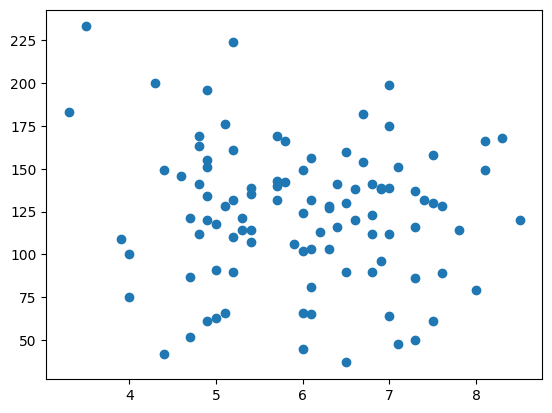

In [ ]:
plt.scatter(df['cgpa'],df['iq'])   # to implement EDA, we are using matlplot library to plot the data

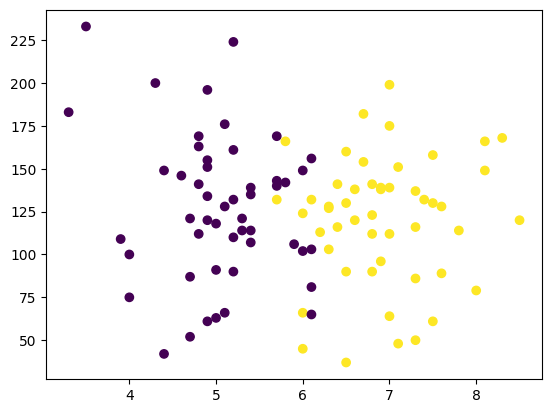

In [ ]:
# to understand the graph more clearly we should color the placed students
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
x = df.iloc[:,:2]   # seperating the input cols and output cols
y = df.iloc[:,-1]
print(x)
print(y)

    cgpa     iq
0    6.8  123.0
1    5.9  106.0
2    5.3  121.0
3    7.4  132.0
4    5.8  142.0
..   ...    ...
95   4.3  200.0
96   4.4   42.0
97   6.7  182.0
98   6.3  103.0
99   6.2  113.0

[100 rows x 2 columns]
0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_test_split(x,y,test_size=0.1)


[    cgpa     iq
 53   8.3  168.0
 47   5.2  161.0
 81   5.4  107.0
 98   6.3  103.0
 58   8.0   79.0
 ..   ...    ...
 34   4.8  163.0
 13   6.4  116.0
 30   7.6  128.0
 88   4.4  149.0
 17   3.3  183.0
 
 [90 rows x 2 columns],
     cgpa     iq
 38   6.5  160.0
 60   6.9  139.0
 44   7.5   61.0
 3    7.4  132.0
 49   5.4  135.0
 80   4.9  196.0
 82   6.5   37.0
 74   6.7  154.0
 41   5.4  114.0
 75   4.8  169.0,
 53    1
 47    0
 81    0
 98    1
 58    1
      ..
 34    0
 13    1
 30    1
 88    0
 17    0
 Name: placement, Length: 90, dtype: int64,
 38    1
 60    1
 44    1
 3     1
 49    0
 80    0
 82    1
 74    1
 41    0
 75    0
 Name: placement, dtype: int64]

In [ ]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(x,y,test_size=0.1)

In [ ]:
print(x_training_set)
print(x_test_set)
print(y_training_set)
print(y_test_set)

    cgpa     iq
53   8.3  168.0
43   6.8  141.0
75   4.8  169.0
88   4.4  149.0
18   4.0  100.0
..   ...    ...
14   6.1  103.0
45   6.0   66.0
83   7.5  130.0
91   7.5  158.0
60   6.9  139.0

[90 rows x 2 columns]
    cgpa     iq
66   6.9   96.0
59   4.8  112.0
62   6.0  102.0
16   5.2  224.0
41   5.4  114.0
27   6.0  124.0
46   5.3  114.0
22   4.9  120.0
4    5.8  142.0
21   7.1  151.0
53    1
43    1
75    0
88    0
18    0
     ..
14    0
45    1
83    1
91    1
60    1
Name: placement, Length: 90, dtype: int64
66    1
59    0
62    0
16    0
41    0
27    1
46    0
22    0
4     0
21    1
Name: placement, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_training_set = scaler.fit_transform(x_training_set)  # scaling the input training set
print(x_training_set)

[[ 1.94921764  1.12345547]
 [ 0.66746225  0.45120804]
 [-1.04154493  1.14835352]
 [-1.38334637  0.65039247]
 [-1.72514781 -0.56961212]
 [ 0.24021045  0.12753336]
 [-0.95609457  0.79978078]
 [-1.04154493  0.9989652 ]
 [ 0.83836297 -0.27083548]
 [-1.21244565  0.57569831]
 [ 0.58201189  0.77488273]
 [-1.12699529 -0.8932868 ]
 [-0.2724917   0.42630999]
 [-1.81059816 -0.34552964]
 [ 1.09471405 -1.81451475]
 [ 0.83836297  1.8952951 ]
 [ 0.49656153  0.37651389]
 [ 0.24021045  0.10263531]
 [-2.32330032  1.49692626]
 [-0.01614062  0.65039247]
 [ 0.06930974 -1.04267512]
 [-0.52884278 -0.39532575]
 [ 2.12011835 -0.07165106]
 [-0.95609457 -1.54063617]
 [ 1.09471405  0.35161583]
 [ 1.35106512  0.12753336]
 [ 0.66746225 -0.81859264]
 [-0.6997435   0.22712557]
 [-0.78519386  0.12753336]
 [-0.87064421 -0.79369459]
 [ 1.35106512 -0.8434907 ]
 [ 0.92381333 -1.86431086]
 [-2.1523996   2.7418289 ]
 [-0.95609457  0.27692168]
 [-0.52884278  0.30181973]
 [ 0.06930974  0.22712557]
 [ 0.41111117  0.17732946]
 

In [ ]:
x_test_set = scaler.transform(x_test_set)  # scaling the input training set
print(x_test_set)

[[ 0.75291261 -0.66920433]
 [-1.04154493 -0.27083548]
 [-0.01614062 -0.51981601]
 [-0.6997435   2.51774642]
 [-0.52884278 -0.22103938]
 [-0.01614062  0.02794115]
 [-0.61429314 -0.22103938]
 [-0.95609457 -0.07165106]
 [-0.18704134  0.4761061 ]
 [ 0.92381333  0.70018857]]


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
# model training
clf.fit(x_training_set, y_training_set)

LogisticRegression()

In [ ]:
clf.predict(x_test_set)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
y_test_set

66    1
59    0
62    0
16    0
41    0
27    1
46    0
22    0
4     0
21    1
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_pred = clf.predict(x_test_set)
accuracy_score(y_test_set, y_pred)    # getting the accuracy of my model

0.9

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('my_model.pkl','wb'))   # this is the model we have built using logistic regression algorithm